In [1]:
%matplotlib inline
import torch
import pickle
import numpy as np
import matplotlib.pyplot
from model import SkipGramLanguageModeler
from helper import reduce_to_k_dim, plot_embeddings

In [2]:
with open('vocabulary.pickle', 'rb') as handle:
    vocab = pickle.load(handle)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = { i: word for i, word in enumerate(vocab)}

for word in vocab:
    print(word, end=' ')

10w2 11th 12th 13th 14th 15th 18th 1960s 1970s 1980s 1990s 20s 222p 231p 25th 28th 2nd 31st 40th 6mm 77th a14 aam ab abal abandon abandoned abandoning abated abatements abates abbas abdel abdelaziz abdul abdulaziz abdulla abide abiding ability ablaze able abolished abroad abruptly absolute absolutely absorbed absorbing absorption abu abundance abundant accelerate accelerated accelerating accentuated accept acceptable acceptance accepted accepting access accident accomodate accomodations accompanied accompanying accord accordance according accordingly accords account accounted accounting accounts accrued accumulated accumulating accurate accused aceh achieve achieved achieves achieving acid acknowledge acknowledged acknowleged acquire acquired acquires acquiring acquisition acquisitions acre acreage acres across act acting action actions active actively activities activity acts actual actually adams adana adapingthe add added adding addition additional additions address addressed addres

northeastern northen northermost northern northstar northwest northwestern norway norwegian nosedive notably note noted noteholders notes nothing noticeably notification notified notify noting nova november novi nowak nowruz nowshahr np npeeq nra nuclear nueva nugent nui nuisance number numbers nymex nynas oahu oak oakley oapec obed objection objections objective objects obligated obligation obligations obliged observed observer observers obtain obtained obvious obviously occidental occupants occupation occupied occupy occupying occur occurred occurring occurs ocean oct october oecd oeien oel offensive offer offered offering offers office officer offices official officially officials offload offs offset offsets offsetting offshoot offshore often ohio oil oilers oilfied oilfield oilfields oilfileds oilman oilmen oilpatch oils oilsands ok okesman okla oklahoma ol old olieselskab oljeselskap oman omani omni omnis one one hundred one hundred and eight one hundred and eighty one hundred and

In [3]:
EMBEDDING_DIM = 300
len_vocab = 7953
net = SkipGramLanguageModeler(len_vocab, EMBEDDING_DIM).cuda()

Running Truncated SVD over 7953 words...
Done.
saved vector_space_epoch_10.png


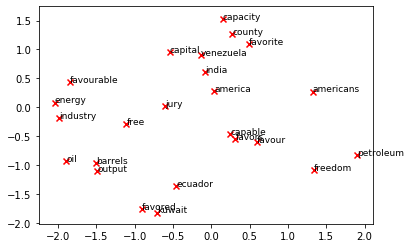

In [5]:
embedding_matrix = net.embedding_outputs(torch.tensor(list(ix_to_word.keys())).cuda()).cpu().detach().numpy()
embedding_matrix_reduced = reduce_to_k_dim(embedding_matrix, k=2)
words = ['barrels', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela','free',
         'freedom','jury', 'favored', 'favorite', 'favors' ,'favour', 'favourable' ,'capable','capacity','capital',
        'county','india','america', 'americans']
plot_embeddings(embedding_matrix_reduced, word_to_ix, words,10)


In [6]:
# initial = 'accurate'
# final = 'barrel'

# for i in range(3):
    
#     PATH='saved_model/saved_model_{}.pth'.format(i)
#     net.load_state_dict(torch.load(PATH))
#     net.eval()
#     outputs_init = net(torch.tensor([word_to_ix[initial]]).cuda())
#     _, predicted_init = torch.max(outputs_init, 1)

#     outputs_final = net(torch.tensor([word_to_ix[final]]).cuda())
#     _, predicted_final = torch.max(outputs_final, 1)

#     print(predicted_init, predicted_final)
embedding_matrix.shape

(7953, 300)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embedding_matrix)

In [8]:
principalComponents

array([[ 2.2672317 , -0.0253171 ],
       [-1.9339391 ,  2.0347633 ],
       [ 0.52572477,  0.8463739 ],
       ...,
       [ 0.2550079 ,  0.5872685 ],
       [ 1.0116684 , -0.385509  ],
       [-1.4515845 ,  1.8495625 ]], dtype=float32)